# Stagg examples

## Conversions

The main purpose of Stagg is to move **st**atistical **agg**reggations, such as histograms, from one framework to the next. This requires a conversion of high-level domain concepts.

Consider the following example: in Numpy, a histogram is simply a 2-tuple of arrays with special meaning—bin contents, then bin edges.

In [1]:
import numpy

numpy_hist = numpy.histogram(numpy.random.normal(0, 1, int(10e6)), bins=80, range=(-5, 5))
numpy_hist

(array([     5,      6,     11,     17,     24,     36,     92,    153,
           216,    339,    568,    919,   1365,   2123,   3120,   4601,
          6601,   9827,  13522,  18855,  25463,  34319,  45627,  59252,
         75957,  96428, 120693, 147142, 177340, 210846, 246321, 284183,
        321165, 357582, 393704, 425717, 453391, 473174, 489798, 495525,
        497347, 490840, 474602, 453037, 424795, 393574, 358691, 320922,
        284138, 247136, 211133, 178113, 147084, 120576,  96548,  77119,
         59747,  45863,  34838,  25605,  18718,  13420,   9819,   6845,
          4490,   3179,   2030,   1321,    947,    573,    364,    219,
           145,     83,     47,     29,     10,      8,      9,      6]),
 array([-5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
        -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
        -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
        -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 

We convert that into its Stagg equivalent with a connector (two-function module: `tostagg` and `tonumpy`).

In [2]:
import stagg.connect.numpy

stagg_hist = stagg.connect.numpy.tostagg(numpy_hist)
stagg_hist

This object is instantiated from a class structure built from simple pieces.

In [3]:
stagg_hist.dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=
    UnweightedCounts(
      counts=
        InterpretedInlineInt64Buffer(
          buffer=
              [     5      6     11     17     24     36     92    153    216    339
                  568    919   1365   2123   3120   4601   6601   9827  13522  18855
                25463  34319  45627  59252  75957  96428 120693 147142 177340 210846
               246321 284183 321165 357582 393704 425717 453391 473174 489798 495525
               497347 490840 474602 453037 424795 393574 358691 320922 284138 247136
               211133 178113 147084 120576  96548  77119  59747  45863  34838  25605
                18718  13420   9819   6845   4490   3179   2030   1321    947    573
                  364    219    145     83     47     29     10      8      9      6])))


Now it can be converted to a ROOT histogram with another connector.

In [4]:
import stagg.connect.root

root_hist = stagg.connect.root.toroot(stagg_hist, "root_hist")
root_hist

Welcome to JupyROOT 6.14/04


<ROOT.TH1D object ("root_hist") at 0x5f18a929d280>

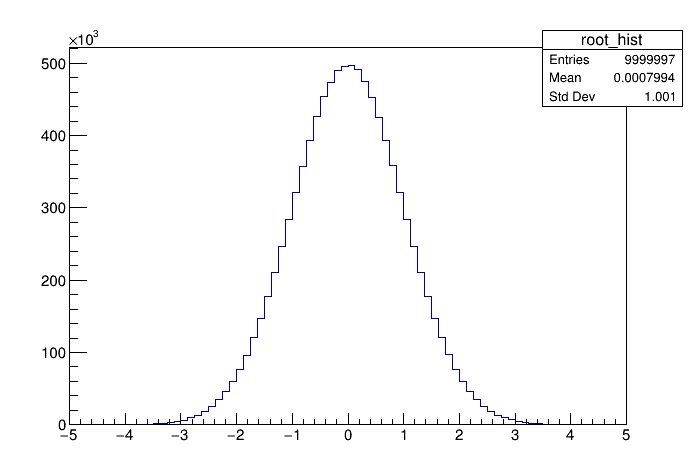

In [5]:
import ROOT
canvas = ROOT.TCanvas()
root_hist.Draw()
canvas.Draw()

And Pandas with yet another connector.

In [6]:
import stagg.connect.pandas

pandas_hist = stagg.connect.pandas.topandas(stagg_hist)
pandas_hist

,unweighted
"[-5.0, -4.875)",5
"[-4.875, -4.75)",6
"[-4.75, -4.625)",11
"[-4.625, -4.5)",17
"[-4.5, -4.375)",24
"[-4.375, -4.25)",36
"[-4.25, -4.125)",92
"[-4.125, -4.0)",153
"[-4.0, -3.875)",216
"[-3.875, -3.75)",339


## Serialization

The `stagg_hist` object is also a [Flatbuffers](http://google.github.io/flatbuffers/) object, which has a [multi-lingual](https://google.github.io/flatbuffers/flatbuffers_support.html), [random-access](https://github.com/mzaks/FlatBuffersSwift/wiki/FlatBuffers-Explained), [small-footprint](http://google.github.io/flatbuffers/md__benchmarks.html) serialization:

In [7]:
stagg_hist.tobuffer()

bytearray(b"\x04\x00\x00\x00\x90\xff\xff\xff\x10\x00\x00\x00\x00\x01\n\x00\x10\x00\x0c\x00\x0b\x00\x04\x00\n\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x01\x04\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x0b\x00\x04\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x02\x08\x00(\x00\x1c\x00\x04\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\xc0\x00\x00\x00\x00\x00\x00\x14@\x01\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\n\x00\t\x00\x04\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x00\x02\x06\x00\x08\x00\x04\x00\x06\x00\x00\x00\x04\x00\x00\x00\x80\x02\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00$\x00\x00\x00\x00\x00\x00\x00\\\x00\x00\x00\x00\x00\x00\x00\x99\x00\x00\x00\x00\x00\x00\x00\xd8\x00\x00\x00\x00\x00\x00\x00S\x01\x00\x00\x00\x00\x00\x008\x02\x00\x00\x00\x00\x00\x00\x97\x03\x00\x00\x00\x00\x00\x00U\x05\x00\x00\x00\x00\x00\x

In [8]:
print("Numpy size: ", numpy_hist[0].nbytes + numpy_hist[1].nbytes)

tmessage = ROOT.TMessage()
tmessage.WriteObject(root_hist)
print("ROOT size:  ", tmessage.Length())

import pickle
print("Pandas size:", len(pickle.dumps(pandas_hist)))

print("Stagg size:  ", len(stagg_hist.tobuffer()))

Numpy size:  1288
ROOT size:   1962
Pandas size: 2975
Stagg size:   792


Stagg is generally forseen as a memory format, like [Apache Arrow](https://arrow.apache.org), but for statistical aggregations. Like Arrow, it reduces the need to implement $N(N - 1)/2$ conversion functions among $N$ statistical libraries to just $N$ conversion functions. (See the figure on Arrow's website.)

## Translation of conventions

Stagg also intends to be as close to zero-copy as possible. This means that it must make graceful translations among conventions. Different histogramming libraries handle overflow bins in different ways:

In [9]:
fromroot = stagg.connect.root.tostagg(root_hist)
fromroot.axis[0].binning.dump()
print("Bin contents length:", len(fromroot.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1))
Bin contents length: 82


In [10]:
stagg_hist.axis[0].binning.dump()
print("Bin contents length:", len(stagg_hist.counts.array))

RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0))
Bin contents length: 80


And yet we want to be able to manipulate them as though these differences did not exist.

In [11]:
sum_hist = fromroot + stagg_hist

In [12]:
sum_hist.axis[0].binning.dump()
print("Bin contents length:", len(sum_hist.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.above1, loc_overflow=BinLocation.above2))
Bin contents length: 82


The binning structure keeps track of the existence of underflow/overflow bins and where they are located.

   * ROOT's convention is to put underflow before the normal bins (`below1`) and overflow after (`above1`), so that the normal bins are effectively 1-indexed.
   * Boost.Histogram's convention is to put overflow after the normal bins (`above1`) and underflow after that (`above2`), so that underflow is accessed via `myhist[-1]` in Numpy.
   * Numpy histograms don't have underflow/overflow bins.
   * Pandas could have `Intervals` that extend to infinity.

Stagg accepts all of these, so that it doesn't have to manipulate the bin contents buffer it receives, but knows how to deal with them if it has to combine histograms that follow different conventions.

## Binning types

All the different axis types have an equivalent in Stagg (and not all are single-dimensional).

In [13]:
import stagg
stagg.IntegerBinning(5, 10).dump()
stagg.RegularBinning(100, stagg.RealInterval(-5, 5)).dump()
stagg.HexagonalBinning(0, 100, 0, 100, stagg.HexagonalBinning.cube_xy).dump()
stagg.EdgesBinning([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).dump()
stagg.IrregularBinning([stagg.RealInterval(0, 5),
                        stagg.RealInterval(10, 100),
                        stagg.RealInterval(-10, 10)],
                       overlapping_fill=stagg.IrregularBinning.all).dump()
stagg.CategoryBinning(["one", "two", "three"]).dump()
stagg.SparseRegularBinning([5, 3, -2, 8, -100], 10).dump()
stagg.FractionBinning(error_method=stagg.FractionBinning.clopper_pearson).dump()
stagg.PredicateBinning(["signal region", "control region"]).dump()
stagg.VariationBinning([stagg.Variation([stagg.Assignment("x", "nominal")]),
                        stagg.Variation([stagg.Assignment("x", "nominal + sigma")]),
                        stagg.Variation([stagg.Assignment("x", "nominal - sigma")])]).dump()

IntegerBinning(min=5, max=10)
RegularBinning(num=100, interval=RealInterval(low=-5.0, high=5.0))
HexagonalBinning(qmin=0, qmax=100, rmin=0, rmax=100, coordinates=HexagonalBinning.cube_xy)
EdgesBinning(edges=[0.01 0.05 0.1 0.5 1 5 10 50 100])
IrregularBinning(
  intervals=[
    RealInterval(low=0.0, high=5.0),
    RealInterval(low=10.0, high=100.0),
    RealInterval(low=-10.0, high=10.0)
  ],
  overlapping_fill=IrregularBinning.all)
CategoryBinning(categories=['one', 'two', 'three'])
SparseRegularBinning(bins=[5 3 -2 8 -100], bin_width=10.0)
FractionBinning(error_method=FractionBinning.clopper_pearson)
PredicateBinning(predicates=['signal region', 'control region'])
VariationBinning(
  variations=[
    Variation(assignments=[
        Assignment(identifier='x', expression='nominal')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nominal + sigma')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nomina

The meanings of these binning classes are given in [the specification](https://github.com/diana-hep/stagg/blob/master/specification.adoc#integerbinning), but many of them can be converted into one another, and converting to `CategoryBinning` (strings) often makes the intent clear.

In [14]:
stagg.IntegerBinning(5, 10).toCategoryBinning().dump()
stagg.RegularBinning(10, stagg.RealInterval(-5, 5)).toCategoryBinning().dump()
stagg.EdgesBinning([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).toCategoryBinning().dump()
stagg.IrregularBinning([stagg.RealInterval(0, 5),
                        stagg.RealInterval(10, 100),
                        stagg.RealInterval(-10, 10)],
                       overlapping_fill=stagg.IrregularBinning.all).toCategoryBinning().dump()
stagg.SparseRegularBinning([5, 3, -2, 8, -100], 10).toCategoryBinning().dump()
stagg.FractionBinning(error_method=stagg.FractionBinning.clopper_pearson).toCategoryBinning().dump()
stagg.PredicateBinning(["signal region", "control region"]).toCategoryBinning().dump()
stagg.VariationBinning([stagg.Variation([stagg.Assignment("x", "nominal")]),
                        stagg.Variation([stagg.Assignment("x", "nominal + sigma")]),
                        stagg.Variation([stagg.Assignment("x", "nominal - sigma")])]).toCategoryBinning().dump()

CategoryBinning(categories=['5', '6', '7', '8', '9', '10'])
CategoryBinning(
  categories=['[-5, -4)', '[-4, -3)', '[-3, -2)', '[-2, -1)', '[-1, 0)', '[0, 1)', '[1, 2)', '[2, 3)', '[3, 4)', '[4, 5)'])
CategoryBinning(
  categories=['[0.01, 0.05)', '[0.05, 0.1)', '[0.1, 0.5)', '[0.5, 1)', '[1, 5)', '[5, 10)', '[10, 50)', '[50, 100)'])
CategoryBinning(categories=['[0, 5)', '[10, 100)', '[-10, 10)'])
CategoryBinning(categories=['[50, 60)', '[30, 40)', '[-20, -10)', '[80, 90)', '[-1000, -990)'])
CategoryBinning(categories=['pass', 'all'])
CategoryBinning(categories=['signal region', 'control region'])
CategoryBinning(categories=['x := nominal', 'x := nominal + sigma', 'x := nominal - sigma'])


This technique can also clear up confusion about overflow bins.

In [15]:
stagg.RegularBinning(5, stagg.RealInterval(-5, 5), stagg.RealOverflow(
    loc_underflow=stagg.BinLocation.above2,
    loc_overflow=stagg.BinLocation.above1,
    loc_nanflow=stagg.BinLocation.below1
    )).toCategoryBinning().dump()

CategoryBinning(
  categories=['{nan}', '[-5, -3)', '[-3, -1)', '[-1, 1)', '[1, 3)', '[3, 5)', '[5, +inf]', '[-inf, -5)'])


# Fancy binning types

You might also be wondering about `FractionBinning`, `PredicateBinning`, and `VariationBinning`.

`FractionBinning` is an axis of two bins: #passing and #total, #failing and #total, or #passing and #failing. Adding it to another axis effectively makes an "efficiency plot."

In [16]:
h = stagg.Histogram([stagg.Axis(stagg.FractionBinning()),
                     stagg.Axis(stagg.RegularBinning(10, stagg.RealInterval(-5, 5)))],
                    stagg.UnweightedCounts(
                        stagg.InterpretedInlineBuffer.fromarray(
                            numpy.array([[  9,  25,  29,  35,  54,  67,  60,  84,  80,  94],
                                         [ 99, 119, 109, 109,  95, 104, 102, 106, 112, 122]]))))
df = stagg.connect.pandas.topandas(h)
df

unweighted
pass [-5.0, -4.0)           9
     [-4.0, -3.0)          25
     [-3.0, -2.0)          29
     [-2.0, -1.0)          35
     [-1.0, 0.0)           54
     [0.0, 1.0)            67
     [1.0, 2.0)            60
     [2.0, 3.0)            84
     [3.0, 4.0)            80
     [4.0, 5.0)            94
all  [-5.0, -4.0)          99
     [-4.0, -3.0)         119
     [-3.0, -2.0)         109
     [-2.0, -1.0)         109
     [-1.0, 0.0)           95
     [0.0, 1.0)           104
     [1.0, 2.0)           102
     [2.0, 3.0)           106
     [3.0, 4.0)           112
     [4.0, 5.0)           122

In [17]:
df = df.unstack(level=0)
df

unweighted     
                    all pass
[-5.0, -4.0)         99    9
[-4.0, -3.0)        119   25
[-3.0, -2.0)        109   29
[-2.0, -1.0)        109   35
[-1.0, 0.0)          95   54
[0.0, 1.0)          104   67
[1.0, 2.0)          102   60
[2.0, 3.0)          106   84
[3.0, 4.0)          112   80
[4.0, 5.0)          122   94

In [18]:
df["unweighted", "pass"] / df["unweighted", "all"]

[-5.0, -4.0)    0.090909
[-4.0, -3.0)    0.210084
[-3.0, -2.0)    0.266055
[-2.0, -1.0)    0.321101
[-1.0, 0.0)     0.568421
[0.0, 1.0)      0.644231
[1.0, 2.0)      0.588235
[2.0, 3.0)      0.792453
[3.0, 4.0)      0.714286
[4.0, 5.0)      0.770492
dtype: float64

`PredicateBinning` means that each bin represents a predicate (if-then rule) in the filling procedure. Stagg doesn't _have_ a filling procedure, but filling-libraries can use this to encode relationships among histograms that a fitting-library can take advantage of, for combined signal-control region fits, for instance. It's possible for those regions to overlap: an input datum might satisfy more than one predicate, and `overlapping_fill` determines which bin(s) were chosen: `first`, `last`, or `all`.

`VariationBinning` means that each bin represents a variation of one of the paramters used to calculate the fill-variables. This is used to determine sensitivity to systematic effects, by varying them and re-filling. In this kind of binning, the same input datum enters every bin.

In [19]:
xdata = numpy.random.normal(0, 1, int(1e6))
sigma = numpy.random.uniform(-0.1, 0.8, int(1e6))

h = stagg.Histogram([stagg.Axis(stagg.VariationBinning([
                        stagg.Variation([stagg.Assignment("x", "nominal")]),
                        stagg.Variation([stagg.Assignment("x", "nominal + sigma")])])),
                     stagg.Axis(stagg.RegularBinning(10, stagg.RealInterval(-5, 5)))],
                    stagg.UnweightedCounts(
                        stagg.InterpretedInlineBuffer.fromarray(
                            numpy.concatenate([
                                numpy.histogram(xdata, bins=10, range=(-5, 5))[0],
                                numpy.histogram(xdata + sigma, bins=10, range=(-5, 5))[0]]))))
df = stagg.connect.pandas.topandas(h)
df

unweighted
x := nominal         [-5.0, -4.0)          25
                     [-4.0, -3.0)        1333
                     [-3.0, -2.0)       21310
                     [-2.0, -1.0)      136078
                     [-1.0, 0.0)       341596
                     [0.0, 1.0)        341226
                     [1.0, 2.0)        135824
                     [2.0, 3.0)         21229
                     [3.0, 4.0)          1356
                     [4.0, 5.0)            22
x := nominal + sigma [-5.0, -4.0)          13
                     [-4.0, -3.0)         543
                     [-3.0, -2.0)       10871
                     [-2.0, -1.0)       84407
                     [-1.0, 0.0)       271585
                     [0.0, 1.0)        368236
                     [1.0, 2.0)        209046
                     [2.0, 3.0)         50163
                     [3.0, 4.0)          4939
                     [4.0, 5.0)           195

In [20]:
df.unstack(level=0)

unweighted                     
             x := nominal x := nominal + sigma
[-5.0, -4.0)           25                   13
[-4.0, -3.0)         1333                  543
[-3.0, -2.0)        21310                10871
[-2.0, -1.0)       136078                84407
[-1.0, 0.0)        341596               271585
[0.0, 1.0)         341226               368236
[1.0, 2.0)         135824               209046
[2.0, 3.0)          21229                50163
[3.0, 4.0)           1356                 4939
[4.0, 5.0)             22                  195

## Collections

You can gather many objects (histograms, functions, ntuples) into a `Collection`, partly for convenience of encapsulating all of them in one object.

In [21]:
stagg.Collection({"one": fromroot, "two": stagg_hist}).dump()

Collection(
  objects={
    'one': Histogram(
      axis=[
        Axis(
          binning=
            RegularBinning(
              num=80,
              interval=RealInterval(low=-5.0, high=5.0),
              overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1)),
          statistics=[
            Statistics(
              moments=[
                Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[1e+07]), n=0),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[1e+07]), n=0, weightpower=1),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[1e+07]), n=0, weightpower=2),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[7994.06]), n=1, weightpower=1),
                Moments(
                  sumwxn=InterpretedInlineFloat64Buffer(buffer=[1.00205e+07]),
                  n=2,
                  weightpower=1)
              ])
          ])
      ],
      counts=
        UnweightedCounts(
 

Not only for convenience: [you can also define](https://github.com/diana-hep/stagg/blob/master/specification.adoc#Collection) an `Axis` in the `Collection` to subdivide all contents by that `Axis`. For instance, you can make a collection of qualitatively different histograms all have a signal and control region with `PredicateBinning`, or all have systematic variations with `VariationBinning`.

It is not necessary to rely on naming conventions to communicate this information from filler to fitter.

## Histogram → histogram conversions

I said in the introduction that Stagg does not fill histograms and does not plot histograms—the two things data analysts are expecting to do. These would be done by user-facing libraries.

Stagg does, however, transform histograms into other histograms, and not just among formats. You can combine histograms with `+`. In addition to adding histogram counts, it combines auxiliary statistics appropriately (if possible).

In [30]:
h1 = stagg.Histogram([
    stagg.Axis(stagg.RegularBinning(10, stagg.RealInterval(-5, 5)),
               statistics=[stagg.Statistics(
                   moments=[
                       stagg.Moments(stagg.InterpretedInlineBuffer.fromarray(numpy.array([10])), n=1),
                       stagg.Moments(stagg.InterpretedInlineBuffer.fromarray(numpy.array([20])), n=2)],
                   quantiles=[
                       stagg.Quantiles(stagg.InterpretedInlineBuffer.fromarray(numpy.array([30])), p=0.5)],
                   mode=stagg.Modes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([40]))),
                   min=stagg.Extremes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([50]))),
                   max=stagg.Extremes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([60]))))])],
    stagg.UnweightedCounts(stagg.InterpretedInlineBuffer.fromarray(numpy.arange(10))))
h2 = stagg.Histogram([
    stagg.Axis(stagg.RegularBinning(10, stagg.RealInterval(-5, 5)),
               statistics=[stagg.Statistics(
                   moments=[
                       stagg.Moments(stagg.InterpretedInlineBuffer.fromarray(numpy.array([100])), n=1),
                       stagg.Moments(stagg.InterpretedInlineBuffer.fromarray(numpy.array([200])), n=2)],
                   quantiles=[
                       stagg.Quantiles(stagg.InterpretedInlineBuffer.fromarray(numpy.array([300])), p=0.5)],
                   mode=stagg.Modes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([400]))),
                   min=stagg.Extremes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([500]))),
                   max=stagg.Extremes(stagg.InterpretedInlineBuffer.fromarray(numpy.array([600]))))])],
    stagg.UnweightedCounts(stagg.InterpretedInlineBuffer.fromarray(numpy.arange(100, 200, 10))))

In [31]:
(h1 + h2).dump()

Histogram(
  axis=[
    Axis(
      binning=RegularBinning(num=10, interval=RealInterval(low=-5.0, high=5.0)),
      statistics=[
        Statistics(
          moments=[
            Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[110]), n=1),
            Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[220]), n=2)
          ],
          min=Extremes(values=InterpretedInlineInt64Buffer(buffer=[50])),
          max=Extremes(values=InterpretedInlineInt64Buffer(buffer=[600])))
      ])
  ],
  counts=
    UnweightedCounts(
      counts=InterpretedInlineInt64Buffer(buffer=[100 111 122 133 144 155 166 177 188 199])))


The corresponding moments of `h1` and `h2` were matched and added, quantiles and modes were dropped (no way to combine them), and the correct minimum and maximum were picked; the histogram contents were added as well.

Another important histogram → histogram conversion is axis-reduction, which can take three forms:

   * slicing an axis, either dropping the eliminated bins or (if possible, depending on binning type) adding them to underflow/overflow;
   * rebinning by combining neighboring bins;
   * projecting out an axis, removing it entirely, summing over all existing bins.

All of these operations use a Pandas-inspired `loc`/`iloc` syntax.

In [34]:
h = stagg.Histogram(
    [stagg.Axis(stagg.RegularBinning(10, stagg.RealInterval(-5, 5)))],
    stagg.UnweightedCounts(
        stagg.InterpretedInlineBuffer.fromarray(numpy.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))))

`loc` slices in the data's coordinate system. `1.5` rounds up to bin index `6`. The first five bins get combined into an overflow bin: `150 = 10 + 20 + 30 + 40 + 50`.

In [37]:
h.loc[1.5:].dump()

Histogram(
  axis=[
    Axis(
      binning=
        RegularBinning(
          num=4,
          interval=RealInterval(low=1.0, high=5.0),
          overflow=
            RealOverflow(
              loc_underflow=BinLocation.above1,
              minf_mapping=RealOverflow.missing,
              pinf_mapping=RealOverflow.missing,
              nan_mapping=RealOverflow.missing)))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[60 70 80 90 150])))


`iloc` 